<a href="https://colab.research.google.com/github/harshiiiit/Mental-Health-Prediction/blob/main/MentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [1]:
import pandas as pd

# 2. Importing the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/donSalieri-rgb/Mental-Health-Prediction/main/survey.csv'
data = pd.read_csv(url)

print(data.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

# 3. Taking Care of Missing Values

In [3]:
#data.isnull() # Returns Boolena value True/False indicating the value is present or not.
data.isnull().sum() # Returns the sum of all True values indicating the number of values missing in an attribute.
data = data.dropna()
data.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

# 4. Taking Care of Duplicate Values

In [4]:
 data_dup = data.duplicated().any() # Returns True if any duplicate value is present in the Dataset.
 data_dup

False

In [5]:
data = data.drop_duplicates() # This function drops all the duplicate values present in the Dataset.
data_dup = data.duplicated().any() # Check again if all duplicate values have been dropped or not.
data_dup

False

# 5. Data Processing

In [6]:
from sklearn import preprocessing
#Encode data in form of 1 and 0
labelDict={}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    #Get Labels
    labelKey='label_'+feature
    labelValue=[*le_name_mapping]
    labelDict[labelKey]=labelValue

for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
data = data.drop(['Country'], axis= 1)
data.head()

label_Timestamp ['2014-08-27 11:36:48', '2014-08-27 11:37:08', '2014-08-27 11:39:36', '2014-08-27 11:43:36', '2014-08-27 11:44:43', '2014-08-27 12:23:59', '2014-08-27 12:43:28', '2014-08-27 12:43:40', '2014-08-27 12:46:03', '2014-08-27 12:50:57', '2014-08-27 12:51:25', '2014-08-27 12:57:38', '2014-08-27 13:07:46', '2014-08-27 13:15:25', '2014-08-27 13:23:38', '2014-08-27 13:35:23', '2014-08-27 13:47:27', '2014-08-27 13:54:00', '2014-08-27 14:13:02', '2014-08-27 14:23:51', '2014-08-27 14:39:20', '2014-08-27 14:45:12', '2014-08-27 15:21:59', '2014-08-27 15:22:20', '2014-08-27 15:22:52', '2014-08-27 15:26:57', '2014-08-27 15:38:32', '2014-08-27 15:53:39', '2014-08-27 15:55:07', '2014-08-27 16:01:39', '2014-08-27 16:21:54', '2014-08-27 16:27:47', '2014-08-27 16:55:04', '2014-08-27 19:45:36', '2014-08-27 21:15:09', '2014-08-27 22:06:14', '2014-08-27 22:55:13', '2014-08-27 23:10:16', '2014-08-27 23:54:08', '2014-08-28 00:43:40', '2014-08-28 02:17:42', '2014-08-28 04:07:34', '2014-08-28 11:04

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,0,11,12,1,0,1,1,2,2,0,...,0,1,1,2,2,1,2,0,0,64
25,1,13,12,17,0,1,1,3,5,0,...,4,2,1,1,2,1,2,1,0,67
33,2,20,7,22,0,1,1,3,2,1,...,4,0,1,1,1,0,2,0,0,23
45,3,16,3,18,0,1,1,3,2,0,...,2,1,1,1,2,1,1,2,0,60
49,4,8,12,4,0,1,1,2,2,0,...,0,0,1,1,2,1,1,0,0,20


In [7]:
# First seperate categorical columns and numerical columns because we have to handle them seperately.
cate_val = [] # To store categorical columns.
cont_val = [] # To store numerical columns.

for column in data.columns:
  if data[column].nunique() <= 10:
    cate_val.append(column) # If there are less than 11 values in column then it can be considered in categorical column.
  else:
    cont_val.append(column) # If more than 10 unique values then in numerical column.

In [8]:
cate_val # All categorical colummns.

['self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [9]:
cont_val # All numerical columns.

['Timestamp', 'Age', 'Gender', 'state', 'comments']

# 6. Encoding Categorical Data

In [10]:
""" We will first create binary vectors for all the categorical columns. 
    The size of these binary vectors will depend on the number of unique values present in the respective column. These vectors will contain dummy variables.
    These dummy variables are not required for sex and target column as they have only two values.
    Because of these dummy variables we will have a problem called dummy variable trap, 
    in this scenario the independent variable are highly corelated meaning one variable can be predicted from others. 
    To remove this problem we remove the first column.
    Eg. for 'cp' column we have values [0,1,2,3] -: The binary vectors will be 
                                                    0 1 2 3
                                                    1 0 0 0
                                                    0 1 0 0
                                                    0 0 1 0
                                                    0 0 0 1
"""
pd.get_dummies(data,columns=cate_val,drop_first=True)

,Timestamp,Age,Gender,state,comments,self_employed_1,family_history_1,treatment_1,work_interfere_1,work_interfere_2,...,coworkers_2,supervisor_1,supervisor_2,mental_health_interview_1,mental_health_interview_2,phys_health_interview_1,phys_health_interview_2,mental_vs_physical_1,mental_vs_physical_2,obs_consequence_1
24,0,11,12,1,64,0,1,1,0,1,...,1,0,1,1,0,0,1,0,0,0
25,1,13,12,17,67,0,1,1,0,0,...,0,0,1,1,0,0,1,1,0,0
33,2,20,7,22,23,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
45,3,16,3,18,60,0,1,1,0,0,...,0,0,1,1,0,1,0,0,1,0
49,4,8,12,4,20,0,1,1,0,1,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,81,29,10,15,37,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1190,82,22,6,14,54,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,0
1219,83,16,7,18,22,0,0,1,0,0,...,1,0,1,1,0,1,0,0,0,0
1221,84,24,12,8,46,0,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0


In [11]:
data.head() # To check the dummy variables formed.

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,0,11,12,1,0,1,1,2,2,0,...,0,1,1,2,2,1,2,0,0,64
25,1,13,12,17,0,1,1,3,5,0,...,4,2,1,1,2,1,2,1,0,67
33,2,20,7,22,0,1,1,3,2,1,...,4,0,1,1,1,0,2,0,0,23
45,3,16,3,18,0,1,1,3,2,0,...,2,1,1,1,2,1,1,2,0,60
49,4,8,12,4,0,1,1,2,2,0,...,0,0,1,1,2,1,1,0,0,20


In [12]:
""" As we can see from the table the values of the columns are not in the same scale.
    So thats why we require feature scaling.
    Feature Scaling is essential for ML Algorithms to calculate the distance between the data.
    If not done then values with high range start dominating.
    Algorithms that require feature scaling - K Nearest Neighbours, Neural Network, SVM, Linear Regression and Logistic Regression.
    Non linear ML Algortihms such as Random Forest, Decision Forest, Ada Boost, etc.
""" 
data.head()
#  Feature Scaling is not required for the encoded categorical columns.

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,0,11,12,1,0,1,1,2,2,0,...,0,1,1,2,2,1,2,0,0,64
25,1,13,12,17,0,1,1,3,5,0,...,4,2,1,1,2,1,2,1,0,67
33,2,20,7,22,0,1,1,3,2,1,...,4,0,1,1,1,0,2,0,0,23
45,3,16,3,18,0,1,1,3,2,0,...,2,1,1,1,2,1,1,2,0,60
49,4,8,12,4,0,1,1,2,2,0,...,0,0,1,1,2,1,1,0,0,20


# 7. Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler # importing library

In [14]:
st = StandardScaler() # Instance of Standard Scaler
data[cont_val] = st.fit_transform(data[cont_val]) # Using function to transform all continous columns to same scale.

In [15]:
data.head() # Now we can see that all the values are in the same scale.

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,-1.712026,-0.325052,1.582840,-1.383870,0,1,1,2,2,0,...,0,1,1,2,2,1,2,0,0,1.032551
25,-1.671743,-0.026074,1.582840,0.637579,0,1,1,3,5,0,...,4,2,1,1,2,1,2,1,0,1.155033
33,-1.631460,1.020351,-0.065153,1.269282,0,1,1,3,2,1,...,4,0,1,1,1,0,2,0,0,-0.641369
45,-1.591178,0.422394,-1.383548,0.763920,0,1,1,3,2,0,...,2,1,1,1,2,1,1,2,0,0.869242
49,-1.550895,-0.773520,1.582840,-1.004848,0,1,1,2,2,0,...,0,0,1,1,2,1,1,0,0,-0.763850


# 8. Splitting The Dataset Into The Training Set and Test Set

In [16]:
# We perform this step which later helps us in evaluating the performance of our ML Algorithms. 
# First seperate the independent variable and dependent variable.
X = data.drop('treatment',axis = 1) # Our dependent variable.
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols]

In [17]:
X # Here you can see all the independent variables.

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere
24,-0.325052,1.582840,1,2,1,2,0,2
25,-0.026074,1.582840,1,2,2,1,4,3
33,1.020351,-0.065153,1,2,2,2,4,3
45,0.422394,-1.383548,1,2,2,2,2,3
49,-0.773520,1.582840,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...
1186,2.365755,0.923643,0,0,1,0,0,2
1190,1.319330,-0.394752,1,2,2,2,0,3
1219,0.422394,-0.065153,0,2,0,2,4,3
1221,1.618308,1.582840,1,0,1,0,0,3


In [18]:
y = data['treatment'] # Our dependent variable.
y

24      1
25      1
33      1
45      1
49      1
       ..
1186    0
1190    1
1219    1
1221    1
1249    1
Name: treatment, Length: 86, dtype: int64

In [19]:
# To perform Train/Test split we have to import library
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42) # We create two set, one for training and one for test
# We set aside 20% data for testing purpose.

In [21]:
X_train # The training set containing independent variables.

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere
875,-0.773520,1.253242,1,0,1,0,3,3
1076,1.169841,-0.065153,1,2,1,0,0,3
200,-1.072499,-1.383548,1,2,0,0,4,3
488,-1.221988,-0.065153,0,1,0,2,4,3
627,-0.175563,1.582840,1,1,2,2,2,3
...,...,...,...,...,...,...,...,...
342,-1.072499,-0.065153,0,0,1,0,4,3
930,-0.026074,-1.383548,1,2,1,2,1,3
1070,0.571883,-1.383548,0,1,0,0,0,3
231,0.870862,-0.065153,0,2,2,0,0,2


In [22]:
X_test # The test set containing independent variables.

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere
1082,-0.773520,-1.383548,1,2,0,0,1,1
24,-0.325052,1.582840,1,2,1,2,0,2
1050,-1.221988,0.923643,1,2,2,0,0,3
372,2.216265,-0.394752,1,2,2,2,4,2
215,-1.072499,0.923643,1,1,0,0,3,3
889,0.571883,-0.065153,1,2,0,0,0,3
178,1.468819,-1.713147,0,2,0,2,1,3
288,0.422394,-1.383548,0,1,2,0,0,3
49,-0.773520,1.582840,1,2,0,0,0,2
989,-1.819945,-2.372344,1,2,2,2,4,1


In [23]:
data.head()
# As we can see the target variable has 0/1 values so we find that this is a classification problem. So from here we will use classification algorithms.

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,-1.712026,-0.325052,1.582840,-1.383870,0,1,1,2,2,0,...,0,1,1,2,2,1,2,0,0,1.032551
25,-1.671743,-0.026074,1.582840,0.637579,0,1,1,3,5,0,...,4,2,1,1,2,1,2,1,0,1.155033
33,-1.631460,1.020351,-0.065153,1.269282,0,1,1,3,2,1,...,4,0,1,1,1,0,2,0,0,-0.641369
45,-1.591178,0.422394,-1.383548,0.763920,0,1,1,3,2,0,...,2,1,1,1,2,1,1,2,0,0.869242
49,-1.550895,-0.773520,1.582840,-1.004848,0,1,1,2,2,0,...,0,0,1,1,2,1,1,0,0,-0.763850


In [24]:
from sklearn.linear_model import LogisticRegression # import library for Logisitc Regression Model.

# 9. Logistic Regression

In [25]:
log = LogisticRegression() # Instance of this Logisitic Regression.
log.fit(X_train,y_train) # Train our model.

LogisticRegression()

In [26]:
y_pred1 = log.predict(X_test) # Perform prediction on unseen samples.

In [27]:
# Check the accuracy of the model.
from sklearn.metrics import accuracy_score # import library to check the accuracy.

In [28]:
accuracy_score(y_test, y_pred1)
# accuracy_score(actual_values , predicted values)

0.7777777777777778

# 10. SVC

In [29]:
from sklearn import svm  # import library for Support Vector Machine.

In [30]:
svm = svm.SVC() # Instance for SVC

In [31]:
svm.fit(X_train,y_train) # Train our model.

SVC()

In [32]:
y_pred2 = svm.predict(X_test) # Perform prediction on unseen samples.

In [33]:
accuracy_score(y_test, y_pred2)
# accuracy_score(actual_values , predicted values)

0.7777777777777778

# 11. KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier  # import library for KNeighbors Classifier.

In [35]:
knn = KNeighborsClassifier(n_neighbors = 4) # Instance for KNN

In [36]:
knn.fit(X_train,y_train) # Train our model.

KNeighborsClassifier(n_neighbors=4)

In [37]:
y_pred3 = knn.predict(X_test) # Perform prediction on unseen samples.

In [38]:
accuracy_score(y_test, y_pred3)
# accuracy_score(actual_values , predicted values)

0.7222222222222222

In [39]:
"""
  By default the number of neighbors in KNN is 5.
  So we try different number of neighbors and check for which value we 
  get the best accuracy.
  We store all the accuracy in score list.
"""

score = []

for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))

In [40]:
score # Here we can see that when we have 2 neighbors we get the best accuracy.

[0.7222222222222222,
 0.6666666666666666,
 0.6666666666666666,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.7222222222222222,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

# 12. Non-Linear ML Algorithms

For Non-Linear ML Algorithms pre-processing is not required so we do not perfrom encoding and feature scaling.

In [41]:
"""
url = 'https://raw.githubusercontent.com/donSalieri-rgb/Mental-Health-Prediction/main/survey.csv'
data = pd.read_csv(url)
data = data.drop('Timestamp',axis = 1)
"""

"\nurl = 'https://raw.githubusercontent.com/donSalieri-rgb/Mental-Health-Prediction/main/survey.csv'\ndata = pd.read_csv(url)\ndata = data.drop('Timestamp',axis = 1)\n"

In [42]:
data.head()

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,-1.712026,-0.325052,1.582840,-1.383870,0,1,1,2,2,0,...,0,1,1,2,2,1,2,0,0,1.032551
25,-1.671743,-0.026074,1.582840,0.637579,0,1,1,3,5,0,...,4,2,1,1,2,1,2,1,0,1.155033
33,-1.631460,1.020351,-0.065153,1.269282,0,1,1,3,2,1,...,4,0,1,1,1,0,2,0,0,-0.641369
45,-1.591178,0.422394,-1.383548,0.763920,0,1,1,3,2,0,...,2,1,1,1,2,1,1,2,0,0.869242
49,-1.550895,-0.773520,1.582840,-1.004848,0,1,1,2,2,0,...,0,0,1,1,2,1,1,0,0,-0.763850


In [43]:
data = data.drop_duplicates() # Removing all the duplicate values.

In [44]:
data.shape

(86, 26)

In [45]:
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols]
y = data['treatment']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# 13. Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier # import library for Decision Tree Classifier.

In [48]:
dt = DecisionTreeClassifier() # Instance of DecisionTreeClassifier.

In [49]:
dt.fit(X_train,y_train) # Train our model.

DecisionTreeClassifier()

In [50]:
y_pred4 = dt.predict(X_test) # Perform prediction on unseen samples.

In [51]:
accuracy_score(y_test,y_pred4) # accuracy_score(actual_values , predicted values)

0.7222222222222222

# 14. Random Forest Classifier


In [52]:
from sklearn.ensemble import RandomForestClassifier #  Random Forest Classifier

In [53]:
rf = RandomForestClassifier() # Instance of DecisionTreeClassifier.

In [54]:
rf.fit(X_train,y_train) # Train our model.

RandomForestClassifier()

In [55]:
y_pred5 = dt.predict(X_test) # Perform prediction on unseen samples.

In [56]:
accuracy_score(y_test,y_pred5) # accuracy_score(actual_values , predicted values)

0.7222222222222222

# 15. Success method plot

In [57]:
final_data = pd.DataFrame({'Models' : ['LR','SVM','KNN','DT','RF'],
                           'ACC' : [accuracy_score(y_test,y_pred1),
                                    accuracy_score(y_test,y_pred2),
                                    accuracy_score(y_test,y_pred3),
                                    accuracy_score(y_test,y_pred4),
                                    accuracy_score(y_test,y_pred5)]})
                                    # accuracy_score(acutal value, predicted value)
# The performance of all the models is converted to a data frame using their accuracy score.

In [58]:
final_data

,Models,ACC
0,LR,0.777778
1,SVM,0.777778
2,KNN,0.722222
3,DT,0.722222
4,RF,0.722222


In [59]:
import seaborn as sns # Importing this libarary to visualise the success plot data frame.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


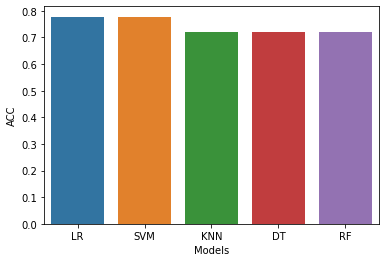

In [60]:
 sns.barplot(final_data['Models'],final_data['ACC'])

# 16. Train best model on entire dataset.


In [61]:
log = LogisticRegression()
log.fit(X,y)

LogisticRegression()

# 17. Prediction on New Data

In [62]:
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
new_data = pd.DataFrame({
    'Age':52, 
    'Gender': 0,
    'family_history':1, 
    'benefits': 1, 
    'care_options': 0, 
    'anonymity': 1, 
    'leave':0, 
    'work_interfere': 0
}, index = [0])

In [63]:
new_data

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere
0,52,0,1,1,0,1,0,0


In [64]:
p = log.predict(new_data)
if p[0] == 0:
  print("Does not require Help")
else:
  print("Requires help")

Does not require Help


# Deplyoment

In [65]:
import pickle

In [66]:
pickle.dump(log, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
print(model)

LogisticRegression()
